In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-12-15 06:20:12.583519: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-15 06:20:13.877574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 06:20:16.283199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print(train_images.shape)
print(train_images.ndim)
print(train_images.dtype)

(60000, 28, 28)
3
uint8


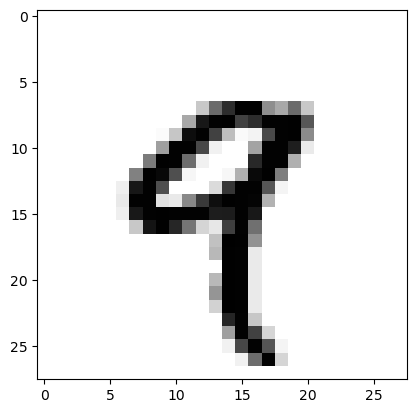

In [5]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show() 

In [6]:
len(train_labels)


60000

In [11]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
print(my_slice.ndim)

(90, 28, 28)
3


In [12]:
train_labels
my_slice = train_images[:, :14, :14]


In [14]:
batch = train_images[:128]

Network consists of 2 Dense layers
The
second (and last) layer is a 10-way softmax layer, which means it will
return an array of 10 probability scores (summing to 1). Each score will
be the probability that the current digit image belongs to one of our 10
digit classes.

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation= 'softmax'))

A loss function, optimizer, measuring only the accuracy metric

In [8]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape
the network expects and scaling it so that all values are in the [0, 1]
interval.

In [9]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') /255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

Categorically encode labels:

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical((train_labels), num_classes=10)
test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8710 - loss: 0.4540
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9665 - loss: 0.1145
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9801 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9846 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9891 - loss: 0.0365


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9762 - loss: 0.0756


In [13]:
print('test_acc:', test_acc)

test_acc: 0.9799000024795532
